<a href="https://colab.research.google.com/github/Manikanta-204/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

$\color{Blue}{\text{Credit Card Default Prediction}}$


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1** - $\color{green}{\text{Manikanta Bommisetti}}$


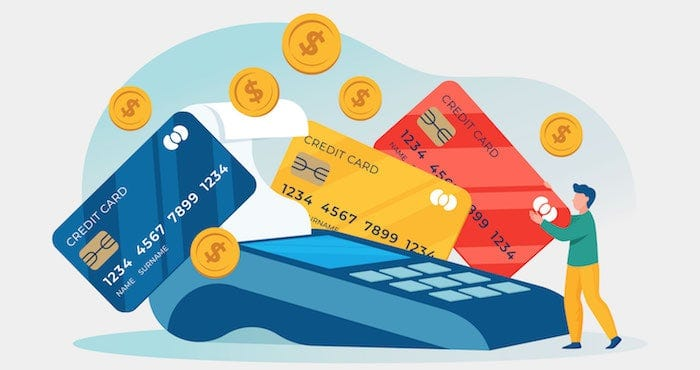

# **Project Summary -**



**Data Preprocessing :**

1.Handling Missing Values: Missing values can be imputed by filling them with a specific value (e.g., mean, median, or mode)

2.Handling Outliers: Outliers are extreme values that deviate significantly from the majority of the data. They can be treated by removing them, transforming them, or imputing them with more robust estimates.

3.Feature Scaling: Features often have different scales, which can affect the performance of certain machine learning algorithms. Scaling techniques like Standardization (subtracting the mean and dividing by the standard deviation) or Normalization (scaling to a specific range, e.g., [0, 1]) can be applied to ensure all features contribute equally.

4.Encoding Categorical Variables: Machine learning algorithms typically require numerical inputs, so categorical variables need to be encoded. Common techniques include one-hot encoding, label encoding, and ordinal encoding, depending on the nature of the categorical variables.

5.Feature Selection: If the dataset contains a large number of features, feature selection techniques can be applied to select the most relevant and informative features. This helps reduce overfitting and improve model performance.

6.Splitting the Data: The dataset is divided into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. Cross-validation can also be employed for more robust evaluation.

**Exploratory data analysis(EDA) :**

1.Explore the distribution of the target variable

2.Check the distribution of other categorical variables

3.Explore the age wise defaulters

4.Explore the bill amount and amount of money paid in previous months

5.Check the status of limit balance wise defaulters

6.Check the status of payment history

7.Explore the correlation between variables

**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. XG Boost Classifier

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

X6 = the repayment status in September, 2005;

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005;

X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# Load Dataset
credit_card_df = pd.read_csv('/content/default of credit card clients_csv.csv',header=1)

### Dataset First View

In [45]:
# Dataset First Look
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [46]:
# Dataset Rows & Columns count
credit_card_df.shape

(30000, 25)

### Dataset Information

In [47]:
# Dataset Info
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [48]:
# Dataset Duplicate Value Count
credit_card_df.duplicated().sum()

0

#### Missing Values/Null Values

In [49]:
# Missing Values/Null Values Count
credit_card_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

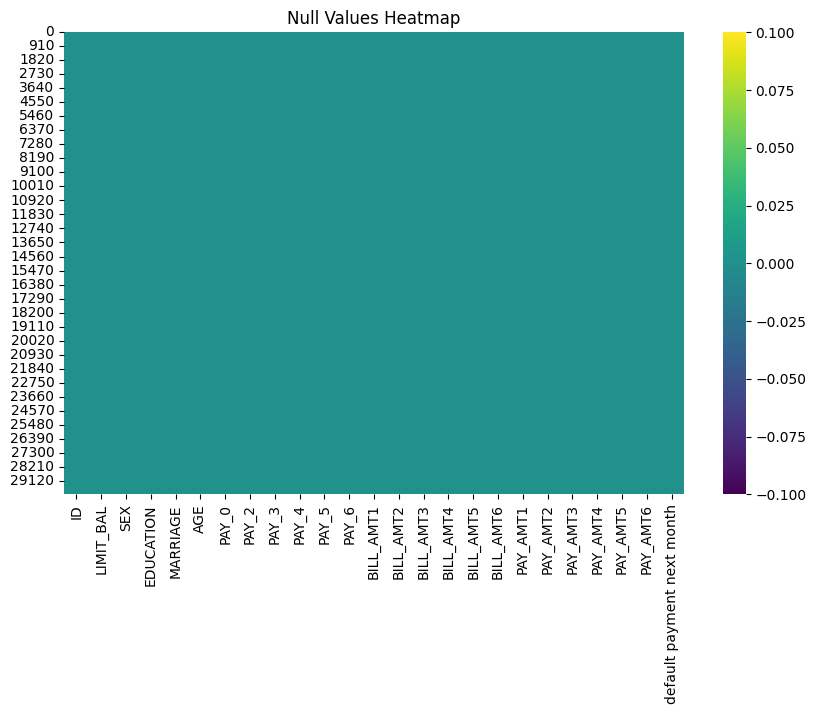

In [50]:
# Visualizing the missing values
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(credit_card_df.isnull(), cmap='viridis', annot=False)
plt.title('Null Values Heatmap')
plt.show()

### What did you know about your dataset?

There are no null,duplicate and missing values

## ***2. Understanding Your Variables***

In [51]:
# Dataset Columns
credit_card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [52]:
# Dataset Describe
credit_card_df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Check Unique Values for each variable.

In [53]:
# Check Unique Values for each variable.
for column in credit_card_df.columns:
    unique_values = credit_card_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")


The unique values of ID are: [    1     2     3 ... 29998 29999 30000]
The unique values of LIMIT_BAL are: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The unique values of SEX are: [2 1]
The unique values of EDUCATION are: [2 1 3 5 4 6 0]
The unique values of MARRIAGE are: [1 2 3 0]
The unique values of AGE are: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31

## 3. ***Data Wrangling***

### Data Wrangling Code

In [54]:
#creating data set
data = credit_card_df.copy()

In [55]:
#creating categorical features
categorical_features = credit_card_df.loc[:,'SEX':'MARRIAGE':1]
categorical_features

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [56]:
#store the numerical feature
numeric_features = [x for x in credit_card_df.columns if x not in categorical_features]
numeric_features

['ID',
 'LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [57]:
#renaming target feature
data.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

In [58]:
#Checking counts of sex
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [59]:
#Checking counts of education
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [60]:
# Replace values in 'EDUCATION' column
data['EDUCATION'] = np.where(data['EDUCATION'].isin([5, 6, 0]), 4, data['EDUCATION'])

# Replace values in 'MARRIAGE' column
data['MARRIAGE'] = np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])

In [61]:
#Checking unique values of education
data['EDUCATION'].unique()

array([2, 1, 3, 4])

In [62]:
#Checking unique values of education
data['MARRIAGE'].unique()

array([1, 2, 3])

In [63]:
#Assign categorical columns
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
data_cat = data[categorical_features].copy()
data_cat['Defaulter'] = data['IsDefaulter']

In [64]:
#Label Decoding of categorical columns
replacement_dict = {
    'SEX': {1: 'MALE', 2: 'FEMALE'},
    'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},
    'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}
}
data_cat.replace(replacement_dict, inplace=True)

In [65]:
#Renaming the columns monthly wise
column_rename_dict = {
    'PAY_0': 'PAY_SEPT',
    'PAY_2': 'PAY_AUG',
    'PAY_3': 'PAY_JUL',
    'PAY_4': 'PAY_JUN',
    'PAY_5': 'PAY_MAY',
    'PAY_6': 'PAY_APR',
    'BILL_AMT1': 'BILL_AMT_SEPT',
    'BILL_AMT2': 'BILL_AMT_AUG',
    'BILL_AMT3': 'BILL_AMT_JUL',
    'BILL_AMT4': 'BILL_AMT_JUN',
    'BILL_AMT5': 'BILL_AMT_MAY',
    'BILL_AMT6': 'BILL_AMT_APR',
    'PAY_AMT1': 'PAY_AMT_SEPT',
    'PAY_AMT2': 'PAY_AMT_AUG',
    'PAY_AMT3': 'PAY_AMT_JUL',
    'PAY_AMT4': 'PAY_AMT_JUN',
    'PAY_AMT5': 'PAY_AMT_MAY',
    'PAY_AMT6': 'PAY_AMT_APR'
}
data.rename(columns=column_rename_dict, inplace=True)

In [66]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### What all manipulations have you done and insights you found?

I have replace the column names and separate the categorical variables it helps to simplify the data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [67]:
#Target feature count
data['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

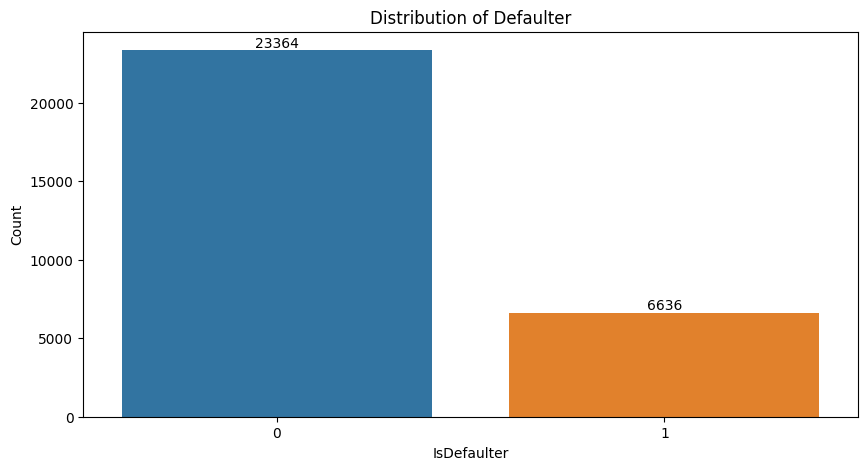

In [68]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(x='IsDefaulter', data=data)
plt.xlabel('IsDefaulter')
plt.ylabel('Count')
plt.title('Distribution of Defaulter')


# Add count values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Countplot for the target variable to compare the defaulter or not

##### 2. What is/are the insight(s) found from the chart?

We can observe the defaulters count is more than non defaulter

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it seems there is a negative impact so many defaulters are there

#### Chart - 2

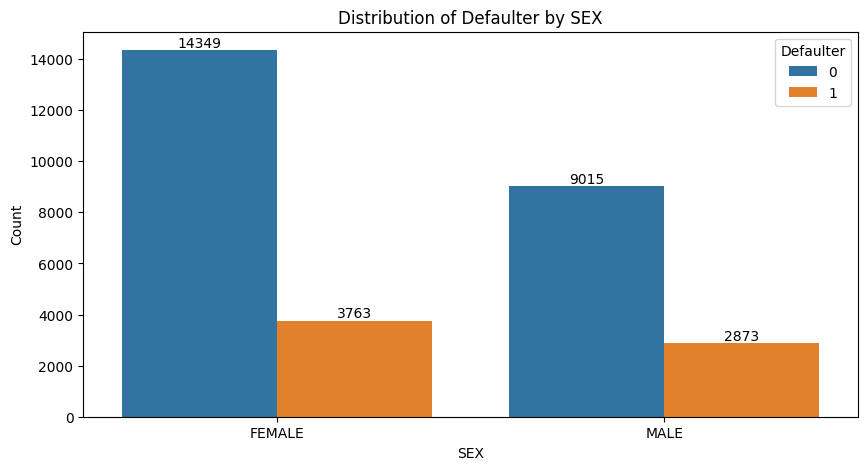

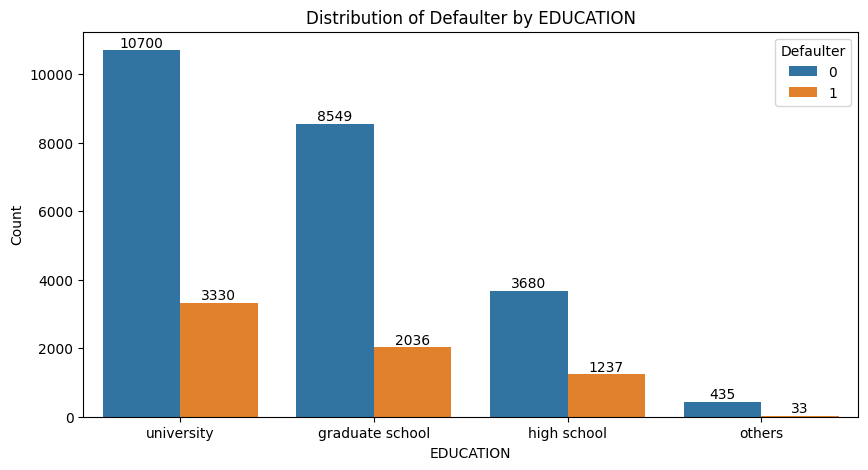

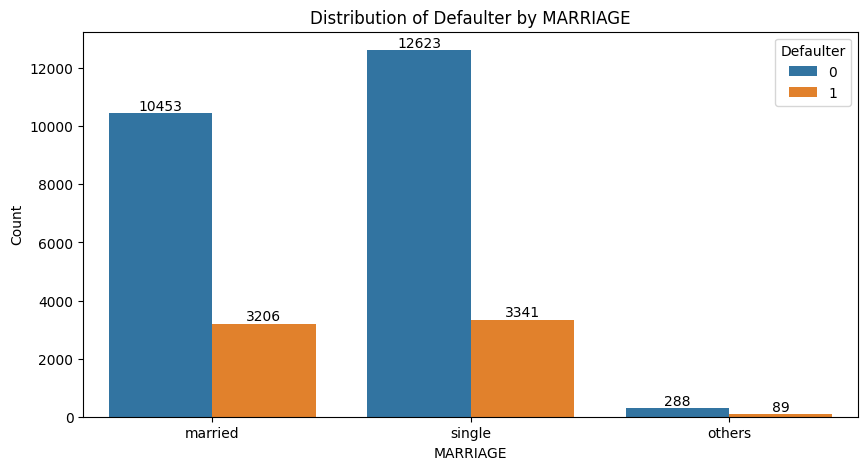

In [69]:
# Chart - 2 visualization code
# Define the categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

# Create count plots for each categorical feature
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Defaulter', data=data_cat)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of Defaulter by {col}')
    plt.legend(title='Defaulter', loc='upper right')
    # Add count values on top of each bar
    for p in plt.gca().patches:
       plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Countplots for categorical variables such as "SEX", "EDUCATION", and "MARRIAGE".

##### 2. What is/are the insight(s) found from the chart?

we can get the values range for all categorical columns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes more number of defaulters there in university and single categorical columns

#### Chart - 3

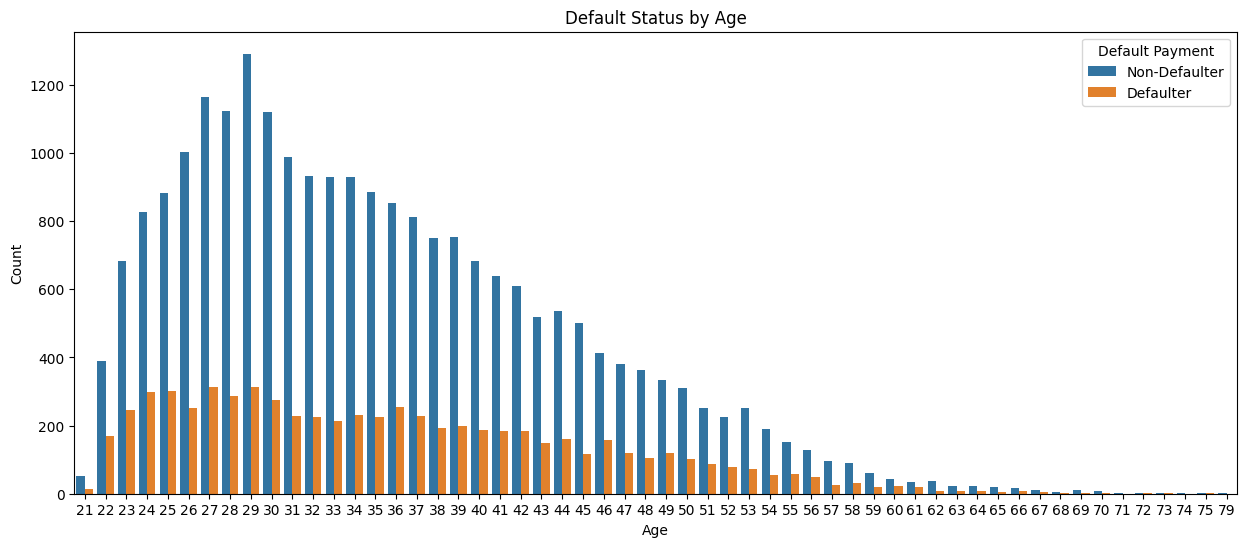

In [70]:
# Chart - 3 visualization code
plt.figure(figsize=(15, 6))
sns.countplot(x='AGE', hue='IsDefaulter', data=data)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Default Status by Age')
plt.legend(title='Default Payment', labels=['Non-Defaulter', 'Defaulter'])
plt.show()


##### 1. Why did you pick the specific chart?

Countplot helps to identify age wise defaulter and non defaulter

##### 2. What is/are the insight(s) found from the chart?

It helps to focus on the people age 22 to 35

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes 27 to 32 age people have more chance to defaulters

#### Chart - 4

In [71]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

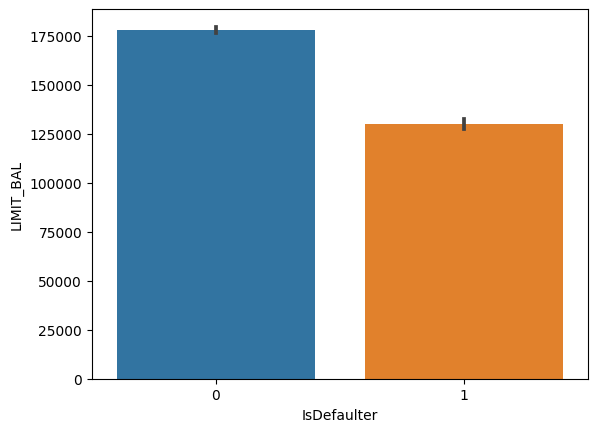

In [72]:
# Chart - 4 visualization code
sns.barplot(x='IsDefaulter',y = 'LIMIT_BAL',data = data)

##### 1. Why did you pick the specific chart?

Countplot helps to idenitfy the defaulters and non defaulter wise limit balance

##### 2. What is/are the insight(s) found from the chart?

Defaulter count of limit balance is more than non defaluter

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gained insights help creating a positive business impact

#### Chart - 5

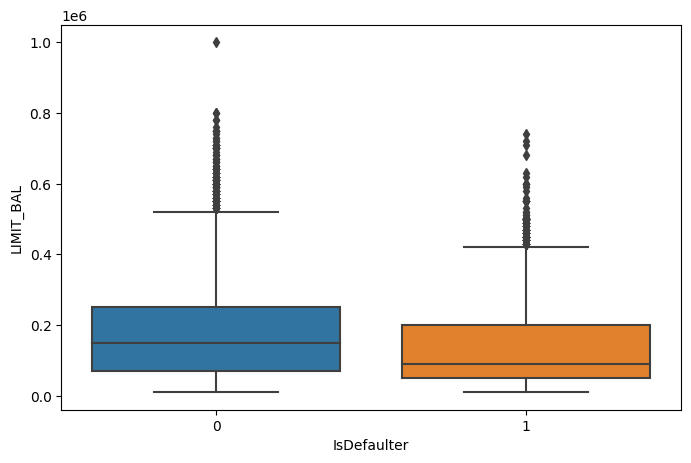

In [75]:
# Chart - 5 visualization code
plt.figure(figsize=(8,5))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=data)

##### 1. Why did you pick the specific chart?

Boxplot helps to identify the outliers

##### 2. What is/are the insight(s) found from the chart?

we can see the outliers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes gained insights helps to the business impact

#### Chart - 6

In [76]:
bill_amnt_df = data[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
pay_amnt_df = data[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]

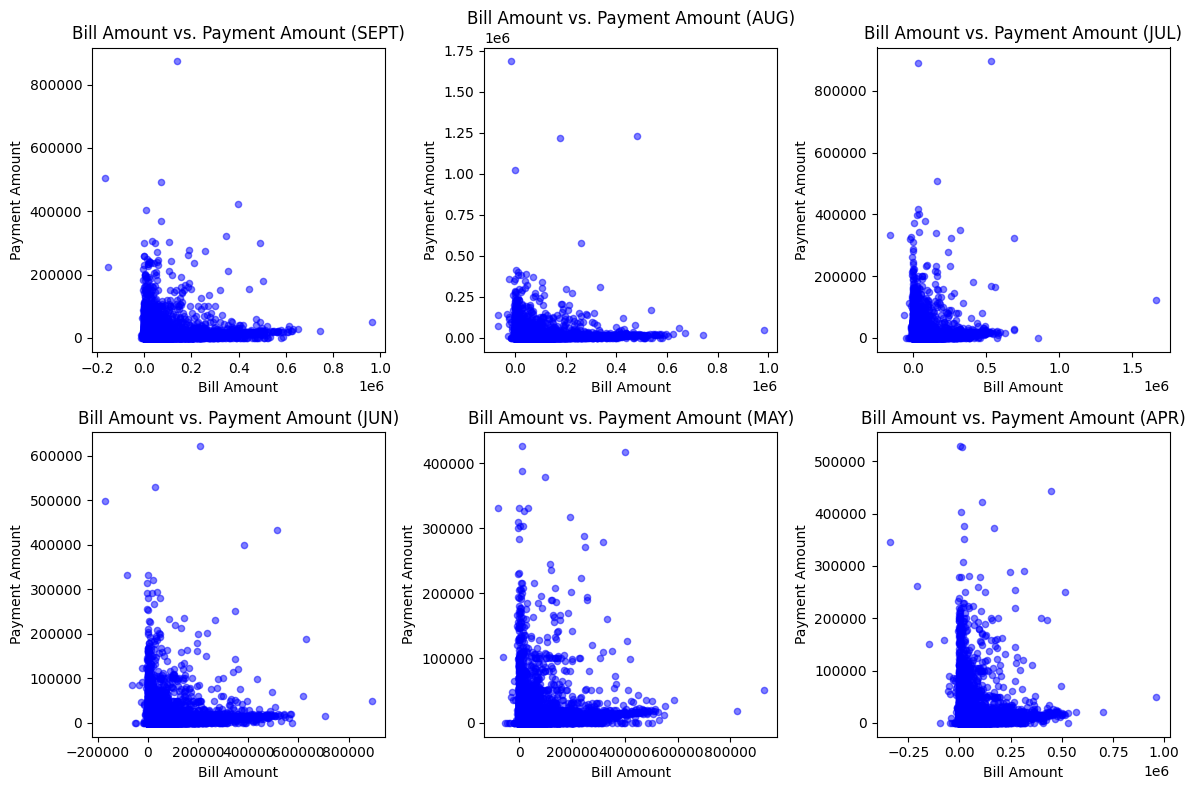

In [77]:
# Chart - 6 visualization code

# Creating separate scatter plots for each month
months = ['SEPT', 'AUG', 'JUL', 'JUN', 'MAY', 'APR']

plt.figure(figsize=(12, 8))

for i, month in enumerate(months):
    bill_amount = bill_amnt_df[f'BILL_AMT_{month}']
    payment_amount = pay_amnt_df[f'PAY_AMT_{month}']

    correlation = bill_amount.corr(payment_amount)  # Calculate the correlation

    plt.subplot(2, 3, i+1)
    plt.scatter(bill_amount, payment_amount, s=20, alpha=0.5, c='blue' if correlation >= 0 else 'red')
    plt.xlabel('Bill Amount')
    plt.ylabel('Payment Amount')
    plt.title(f'Bill Amount vs. Payment Amount ({month})')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot helps visualize the strength and direction of this relationship.

##### 2. What is/are the insight(s) found from the chart?

we can see there is a positive correlation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can observe the overall trend or pattern between the two variables. there is a positive correlation, it suggests that higher bill amounts are associated with higher payment amounts

#### Chart - 7

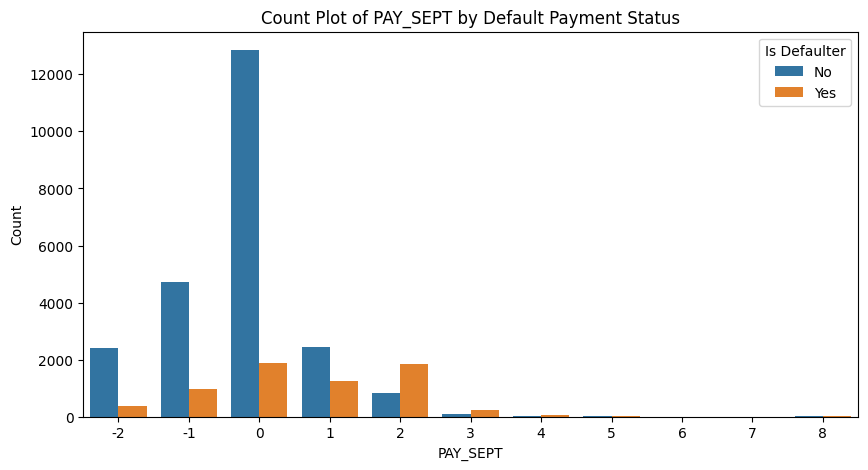

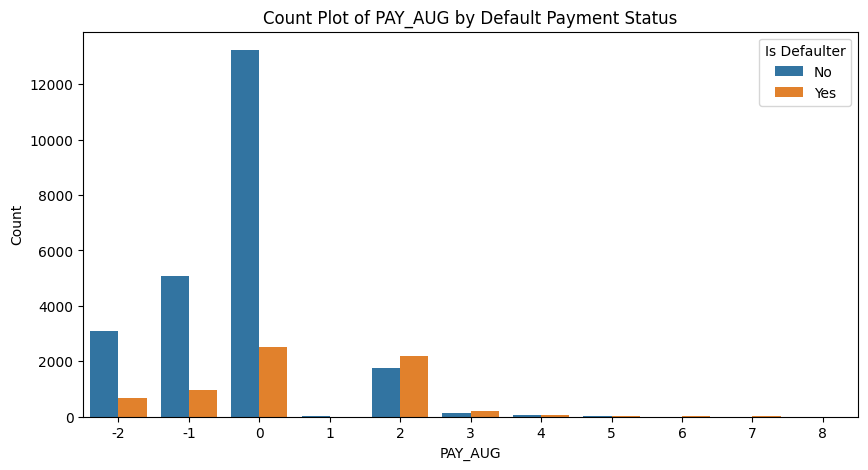

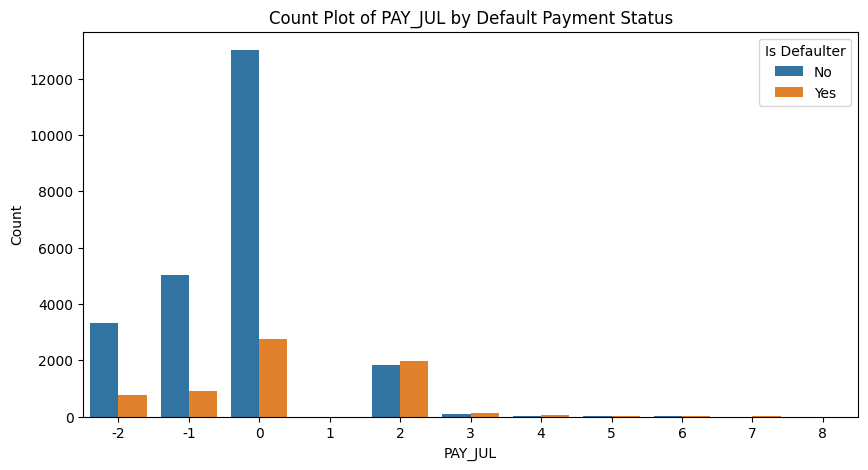

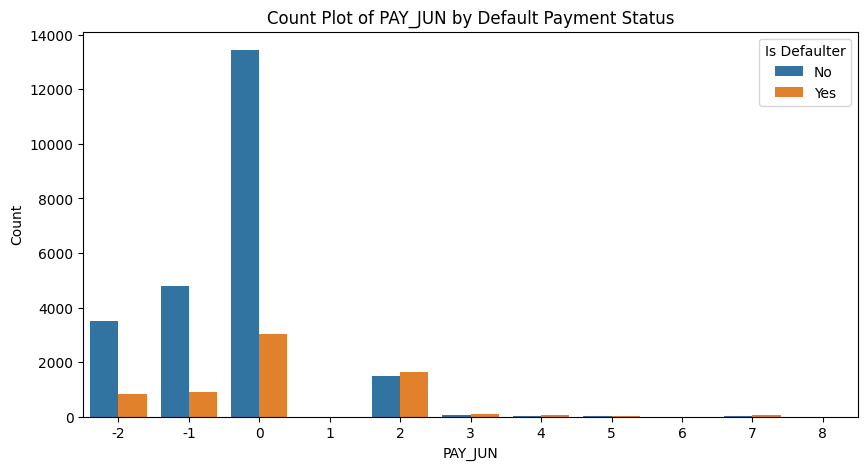

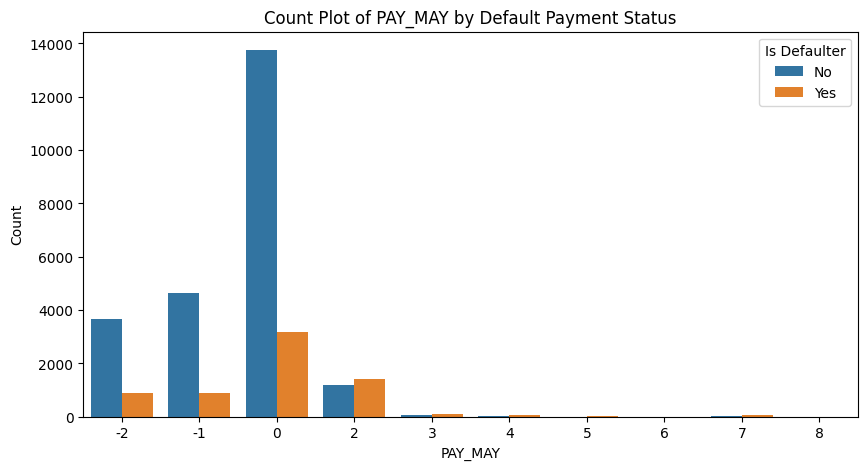

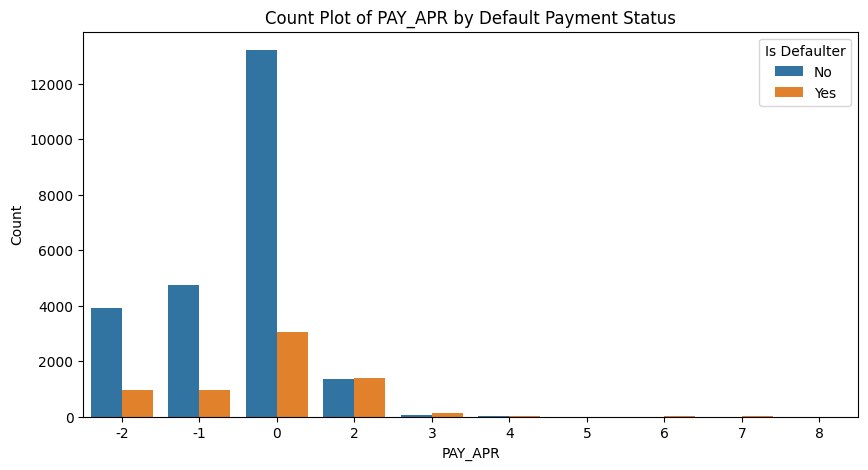

In [78]:
# Chart - 7 visualization code
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='IsDefaulter', data=data)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col} by Default Payment Status')
    plt.legend(title='Is Defaulter', labels=['No', 'Yes'])
    plt.show()


##### 1. Why did you pick the specific chart?

To check the status of payment history

##### 2. What is/are the insight(s) found from the chart?

we can know the status of payment history from past months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes we can see defaulters are more and duly pament is on time

#### Chart - 8 - Correlation Heatmap

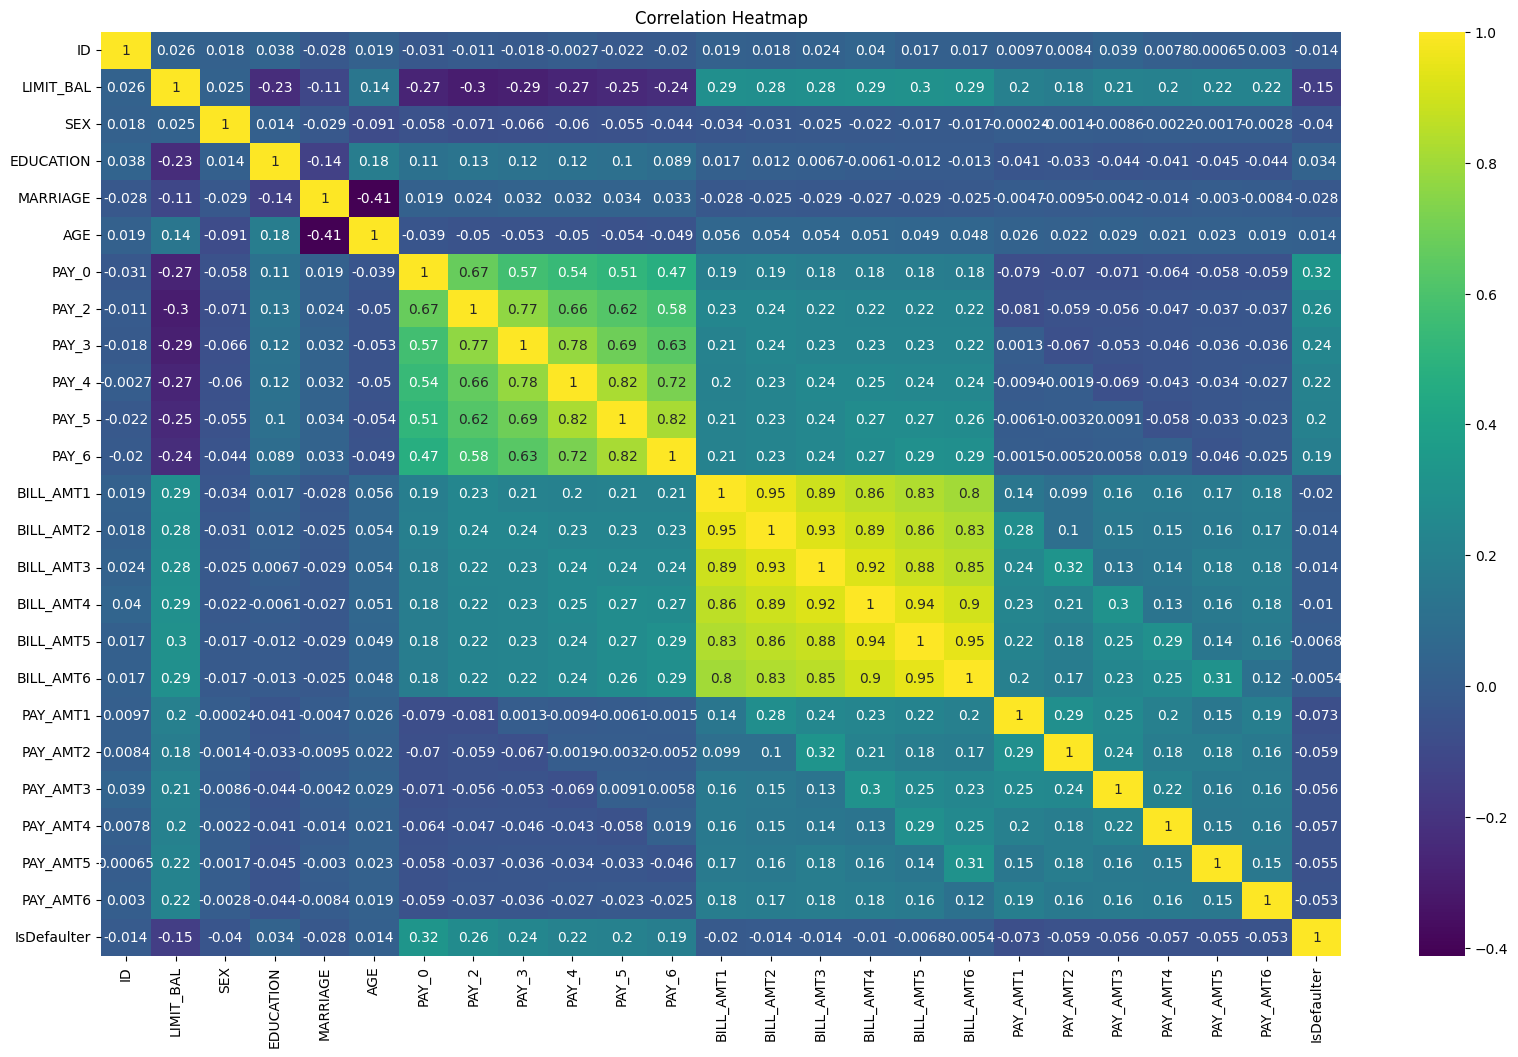

In [23]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To check correlation of varibles

##### 2. What is/are the insight(s) found from the chart?

we can check the correlation of every variables

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#already handled

### 2. Handling Outliers

In [ ]:
#Partialy handled

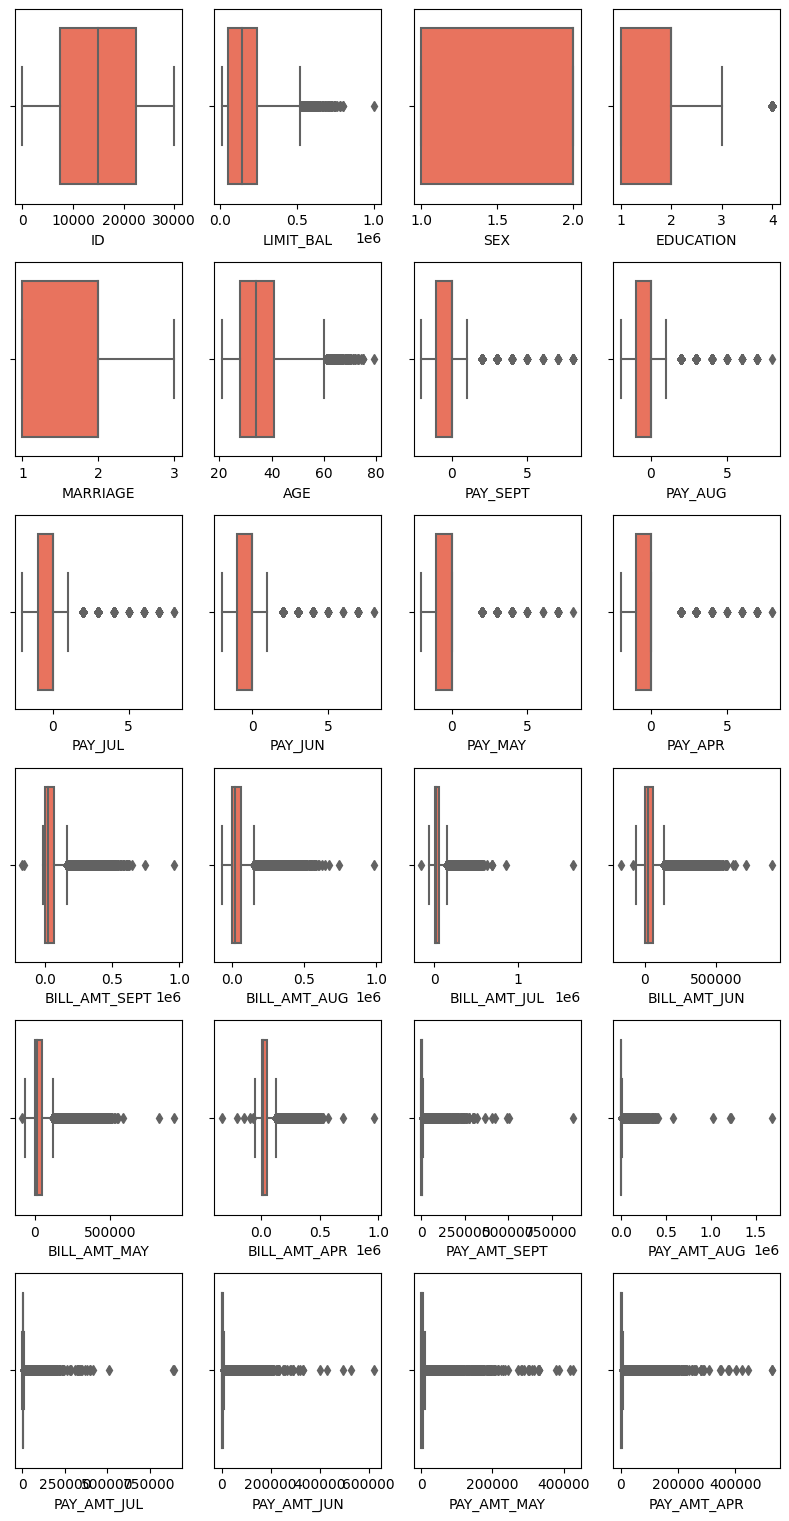

In [79]:
fig = plt.figure(figsize=(8, 25))
c = 1

for i in data.columns[:-1]:
    plt.subplot(10, 4, c)
    plt.xlabel('Distribution of {}'.format(i))
    sns.boxplot(x=i, data=data, color="tomato")
    c += 1

plt.tight_layout()
plt.show()

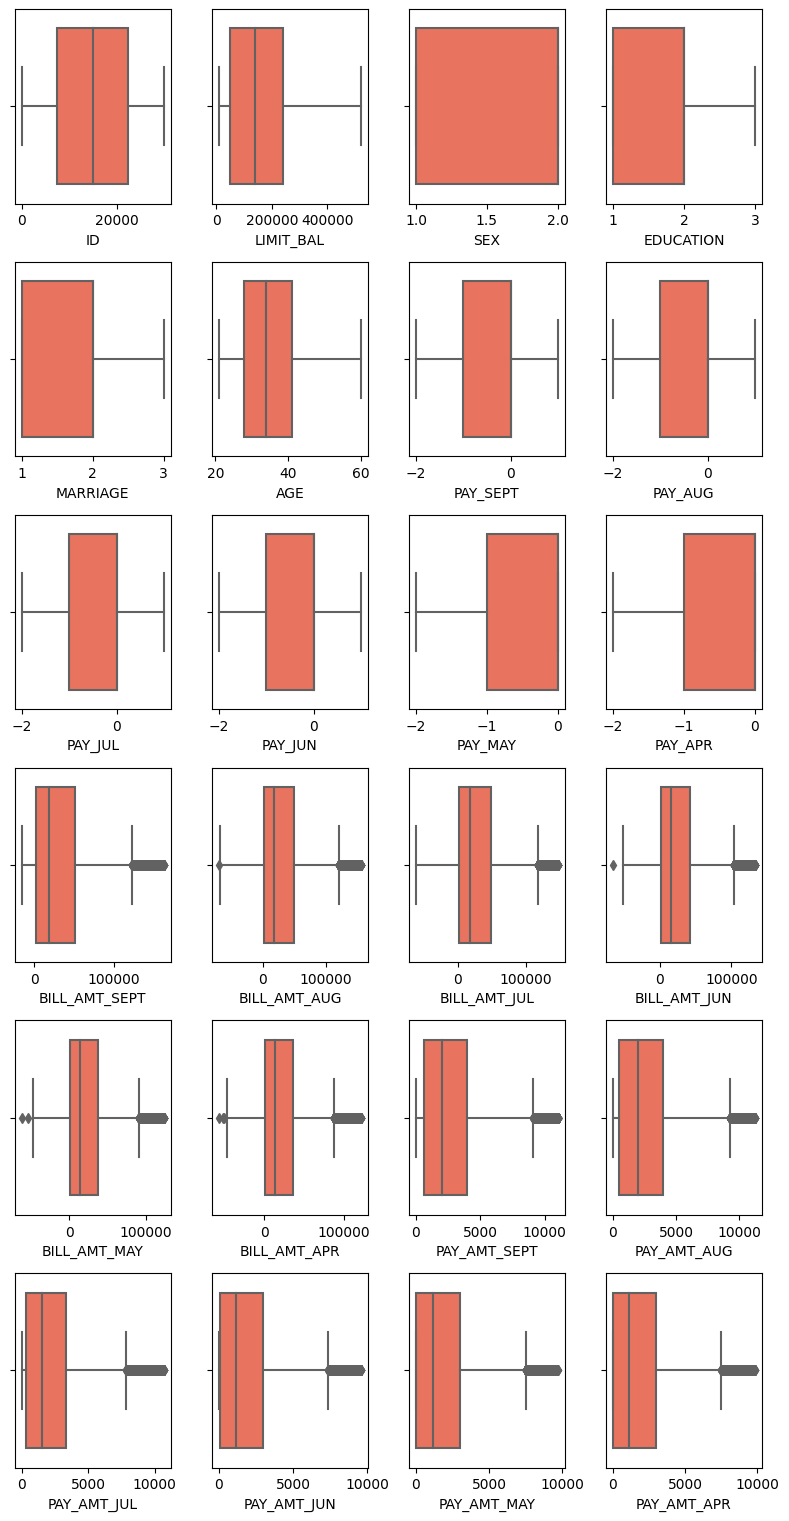

In [80]:
fig = plt.figure(figsize=(8, 25))
c = 1

for i in data.columns[:-1]:
    plt.subplot(10, 4, c)
    plt.xlabel('Distribution of {}'.format(i))

    # Calculate the IQR for the column
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

    # Plot the boxplot without outliers
    sns.boxplot(x=i, data=filtered_data, color="tomato")

    c += 1

plt.tight_layout()
plt.show()



##### What all outlier treatment techniques have you used and why did you use those techniques?

I used inter quartile range with lower and upper bound because it provides a robust measure of the spread or dispersion of the data



### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

data transformation refers to the process of modifying or manipulating the original dataset to improve the performance or suitability of the data for a particular machine learning algorithm or task. Data transformation techniques are often applied as a preprocessing step before training a model.

In [81]:
# Transform Your data
feature_var = data.drop(['ID','IsDefaulter'],axis=1)
target_var = data['IsDefaulter']

### 4. Data Scaling

In [82]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_var = scaler.fit_transform(feature_var)

##### Which method have you used to scale you data and why?



StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way





### 5. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(feature_var,target_var, test_size=0.3, random_state=42)

In [84]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())


Distribution of classes of dependent variable in train :
0    16324
1     4676
Name: IsDefaulter, dtype: int64

 Distribution of classes of dependent variable in test :
0    7040
1    1960
Name: IsDefaulter, dtype: int64


##### What data splitting ratio have you used and why?

I used 70 percent data for train and 30 for test data to predict better results even for new data set

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

yes our data set is imbalanced we can see above the result of train and test data there is a huge difference

In [85]:
#original dataset shape
data.shape

(30000, 25)

In [86]:
#Smote Resampling technque
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['IsDefaulter'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [87]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22679,180000,2,1,1,33,1,-1,-1,-1,...,68,100,211,560,68,68,100,211,417,1259
46724,8840,20000,2,2,2,40,1,2,1,1,...,17458,19466,19415,38258,0,2820,2867,809,5092,784
46725,20610,80000,1,1,2,27,1,1,1,0,...,78377,67732,49825,49649,6926,1376,2518,3600,876,914
46726,23687,81382,2,2,1,29,0,0,0,0,...,79351,41398,29647,30132,2571,2575,1672,853,1333,516


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used  SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used in machine learning for handling imbalanced datasets. It is specifically designed to address the issue of imbalanced class distribution, where the number of instances in the minority class is significantly lower than the majority class.

In [88]:
#store the columns
columns = list(data.columns)

In [89]:
#Removing target feature
columns.pop()

'IsDefaulter'

**Make the balanced data frame**

In [90]:
#Created Balanced data frame
balance_df = pd.DataFrame(x_smote, columns=columns)

In [91]:
#assigning the target feature after resampling
balance_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

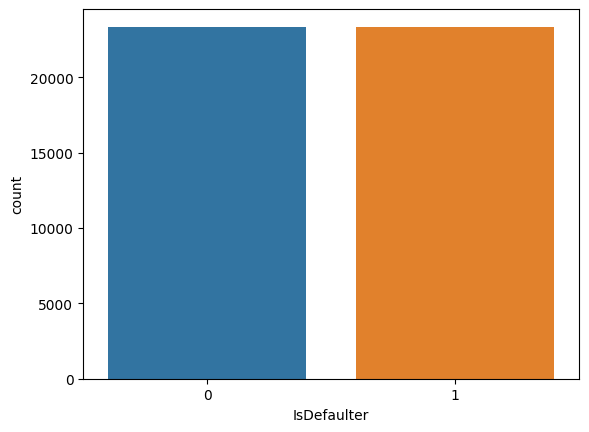

In [92]:
# Default column Visulization after balanced
sns.countplot(x= 'IsDefaulter', data = balance_df)

In [93]:
#checking the non defaulters
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22679,180000,2,1,1,33,1,-1,-1,-1,...,100,211,560,68,68,100,211,417,1259,1
46724,8840,20000,2,2,2,40,1,2,1,1,...,19466,19415,38258,0,2820,2867,809,5092,784,1
46725,20610,80000,1,1,2,27,1,1,1,0,...,67732,49825,49649,6926,1376,2518,3600,876,914,1
46726,23687,81382,2,2,1,29,0,0,0,0,...,41398,29647,30132,2571,2575,1672,853,1333,516,1


 **Feature Engineering:**

In [94]:
#Making new data frame for feature engineering
df_fr = balance_df.copy()

In [95]:
#Concatanating the payment history values
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [96]:
#Checking mean value
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.643554
Name: Payement_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

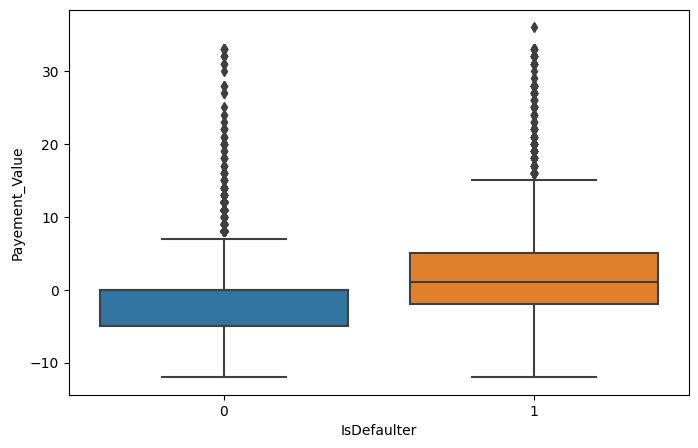

In [98]:
#Checking the outliers
plt.figure(figsize=(8,5))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [99]:
#Feature engineering for bill amount columns
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [100]:
#checking mean of dues
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    193591.874679
Name: Dues, dtype: float64

In [101]:
#checking unique values
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [102]:
#Replacing with others for education
df_fr['EDUCATION'] = df_fr['EDUCATION'].replace([6, 5, 0], 4)


In [103]:
#Checking unique values
df_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [104]:
#Replacing 0 with others in marriage
df_fr['MARRIAGE'] = df_fr['MARRIAGE'].replace(0, 3)


In [105]:
#Categorical Decoding
df_fr['SEX'] = df_fr['SEX'].map({1: 'MALE', 2: 'FEMALE'})
df_fr['EDUCATION'] = df_fr['EDUCATION'].map({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'})
df_fr['MARRIAGE'] = df_fr['MARRIAGE'].map({1: 'married', 2: 'single', 3: 'others'})


In [106]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


**One Hot Encoding :**

One-hot encoding is a technique used to convert categorical variables into a binary representation. It creates new binary columns for each unique category in the original categorical column. Each binary column represents whether a particular category is present or not for each row in the dataset. The value 1 indicates the presence of that category, while 0 indicates its absence.

In [107]:
#one hot encoding for education and marriage
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [108]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0


In [109]:
#Removing others in eduation and marriage columns
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [110]:
#One hot encoding for payment history
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [111]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [112]:
#Label ENCODING
decoders_nums = {
   "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr["SEX"] = df_fr["SEX"].map(decoders_nums["SEX"])



In [113]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [114]:
#removing id column
df_fr.drop('ID',axis = 1, inplace = True)

## ***7. ML Model Implementation***

In [130]:
#Function of confusion matrix
def matrix(y_train, train_class_preds, y_test, test_class_preds):
    labels = ['Not Defaulter', 'Defaulter']
    cm_train = confusion_matrix(y_train, train_class_preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Train Data)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


### ML Model - 1

**Building a Logistic Regression Model**

In [116]:
df_log_reg = df_fr.copy()

In [117]:
#Independent and dependent variables
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter'].copy()

In [118]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [131]:
#Logistic Regression
def logistic_regression(X, y):
    # Split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    print("The shape of the training set is", X_train.shape, y_train.shape)
    print("The shape of the testing set is", X_test.shape, y_test.shape)

    # Transform the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build a logistic regression model
    log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
    log_reg.fit(X_train, y_train)

    #Hyperameter tuning with Grid SearchCV
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)
    grid_lr_clf.fit(X_train, y_train)

    optimized_clf = grid_lr_clf.best_estimator_
    print("Best parameters:", grid_lr_clf.best_params_)
    print("Best score:", grid_lr_clf.best_score_)

    # Get the predicted probabilities
    train_preds = optimized_clf.predict_proba(X_train)[:, 1]
    test_preds = optimized_clf.predict_proba(X_test)[:, 1]

    # Get the predicted classes
    train_class_preds = optimized_clf.predict(X_train)
    test_class_preds = optimized_clf.predict(X_test)

    # Get the accuracy scores
    train_accuracy_lr = accuracy_score(train_class_preds, y_train)
    test_accuracy_lr = accuracy_score(test_class_preds, y_test)

    print("The accuracy on train data is", train_accuracy_lr)
    print("The accuracy on test data is", test_accuracy_lr)

    #Metrics
    test_precision_score_lr = precision_score(test_class_preds, y_test)
    test_recall_score_lr = recall_score(test_class_preds, y_test)
    test_f1_score_lr = f1_score(test_class_preds, y_test)
    test_roc_score_lr = roc_auc_score(test_class_preds, y_test)

    print("The precision on test data is", test_precision_score_lr)
    print("The recall on test data is", test_recall_score_lr)
    print("The f1 on test data is", test_f1_score_lr)
    print("The roc_score on test data is", test_roc_score_lr)

    #Confusion Matrix for train data
    print("\nConfusion Matrix for test data:")
    matrix(y_train,train_class_preds,y_test,test_class_preds)
    print("--------------------------------------------------------")
    print("\nClassification report:")
    print(classification_report(y_test, test_class_preds))
    print("\n")
    print("--------------------------------------------------------")

     # Feature importance
    feature_importance = pd.DataFrame({'Features': X.columns, 'Importance': np.abs(optimized_clf.coef_).ravel()})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)[:10]

    plt.bar(height=feature_importance['Importance'], x=feature_importance['Features'])
    plt.xticks(rotation=80)
    plt.title("Feature importances via coefficients")
    plt.show()

    #Creating ROC_AUC
    y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, y_preds_proba_lr)
    auc = roc_auc_score(y_test, y_preds_proba_lr)
    plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
    plt.legend(loc=4)
    plt.show()

    return (train_accuracy_lr,
           test_accuracy_lr,
           test_precision_score_lr,
           test_recall_score_lr,test_f1_score_lr,test_roc_score_lr,test_preds,optimized_clf)

The shape of the training set is (31307, 80) (31307,)
The shape of the testing set is (15421, 80) (15421,)
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.7507908013670566
The accuracy on train data is 0.7524195866739068
The accuracy on test data is 0.7506646780364438
The precision on test data is 0.6863813229571984
The recall on test data is 0.7876172049412115
The f1 on test data is 0.7335227666504957
The roc_score on test data is 0.7548750239829018

Confusion Matrix for test data:


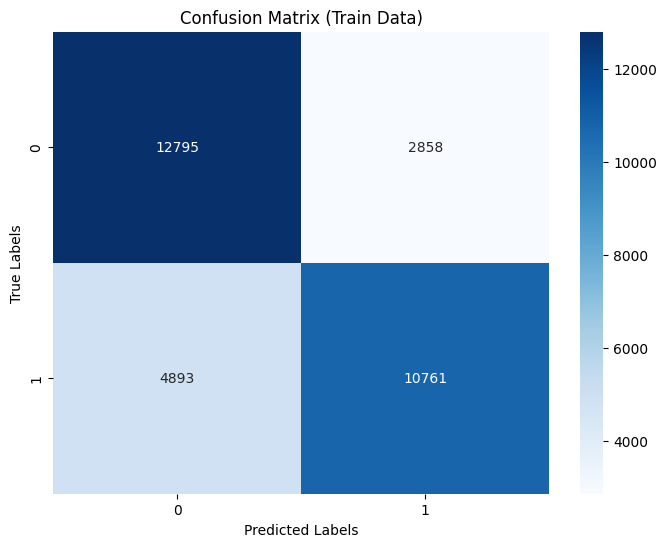

--------------------------------------------------------

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.77      7711
           1       0.79      0.69      0.73      7710

    accuracy                           0.75     15421
   macro avg       0.75      0.75      0.75     15421
weighted avg       0.75      0.75      0.75     15421



--------------------------------------------------------


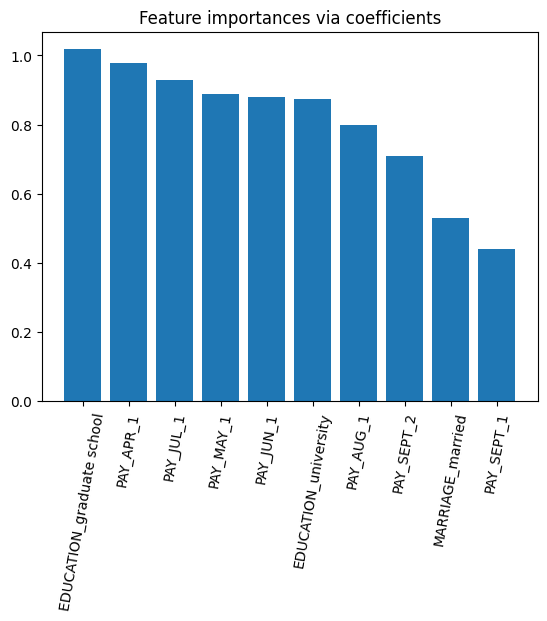

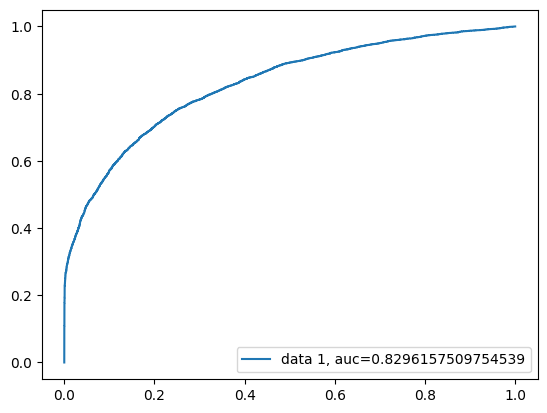

In [132]:
#Running the Model
lr = logistic_regression(X,y)

In [133]:
#store metric values of logistic regression
train_accuracy_lr=lr[0]
test_accuracy_lr = lr[1]
test_precision_score_lr = lr[2]
test_recall_score_lr =lr[3]
test_f1_score_lr = lr[4]
test_roc_score_lr = lr[5]
y_pred_proba_lr = lr[6]
optimal_clf_lr = lr[7]

### ML Model - 2

**Building a Random Forest Model**

In [135]:
#Random Forest Classifier
def randomForest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

    # Define the parameter grid for GridSearchCV
    param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [10, 20, 30]}

    # Create the Random Forest classifier
    rf_clf = RandomForestClassifier()

    # Create GridSearchCV instance
    grid_search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='accuracy', cv=3)

    # Fit the model with GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator from GridSearchCV
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    print("Best parameters:", best_params)

    # Fit the model with the best estimator
    best_estimator.fit(X_train, y_train)

    # Get the predicted classes
    train_class_preds = best_estimator.predict(X_train)
    test_class_preds = best_estimator.predict(X_test)

    test_preds = best_estimator.predict_proba(X_test)[:, 1]

    # Get the accuracy scores
    train_accuracy_rf = accuracy_score(train_class_preds, y_train)
    test_accuracy_rf = accuracy_score(test_class_preds, y_test)

    print("The accuracy on train data is", train_accuracy_rf)
    print("The accuracy on test data is", test_accuracy_rf)

    test_precision_score_rf = precision_score(test_class_preds, y_test)
    test_recall_score_rf = recall_score(test_class_preds, y_test)
    test_f1_score_rf = f1_score(test_class_preds, y_test)
    test_roc_score_rf = roc_auc_score(test_class_preds, y_test)

    print("The precision on test data is", test_precision_score_rf)
    print("The recall on test data is", test_recall_score_rf)
    print("The f1 on test data is", test_f1_score_rf)
    print("The roc_score on test data is", test_roc_score_rf)

    # Confusion matrix for train data
    matrix(y_train,train_class_preds,y_test,test_class_preds)

    print("\nClassification report:")
    print(classification_report(y_test, test_class_preds))
    print("\n")

    # Feature importance
    feature_importance = best_estimator.feature_importances_
    feature_names = X.columns

    sorted_idx = feature_importance.argsort()
    top_features = feature_names[sorted_idx][-10:]  # Selecting top 10 features

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), feature_importance[sorted_idx][-10:])
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Top 10 Feature Importances")
    plt.show()

    # ROC curve
    y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

    return (
        train_accuracy_rf,
        test_accuracy_rf,
        test_precision_score_rf,
        test_recall_score_rf,
        test_f1_score_rf,
        test_roc_score_rf,
        best_estimator,
        test_preds
    )


Best parameters: {'max_depth': 30, 'n_estimators': 200}
The accuracy on train data is 0.998786213945763
The accuracy on test data is 0.8345762272226185
The precision on test data is 0.8027237354085603
The recall on test data is 0.857320958581521
The f1 on test data is 0.8291245227409739
The roc_score on test data is 0.8359391917999046


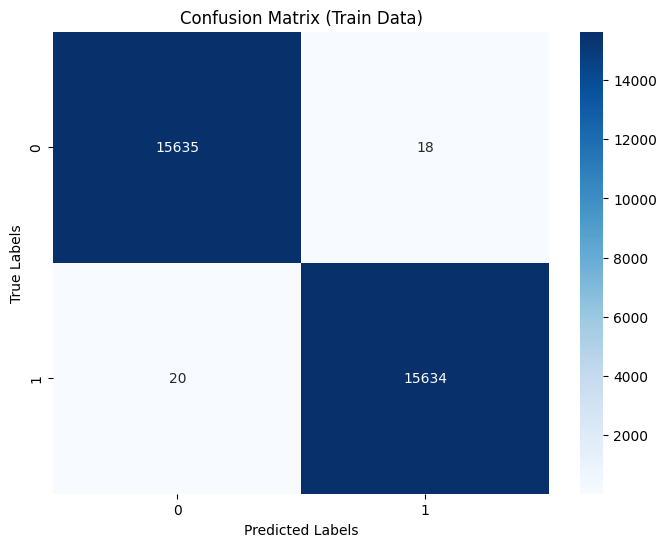


Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7711
           1       0.86      0.80      0.83      7710

    accuracy                           0.83     15421
   macro avg       0.84      0.83      0.83     15421
weighted avg       0.84      0.83      0.83     15421





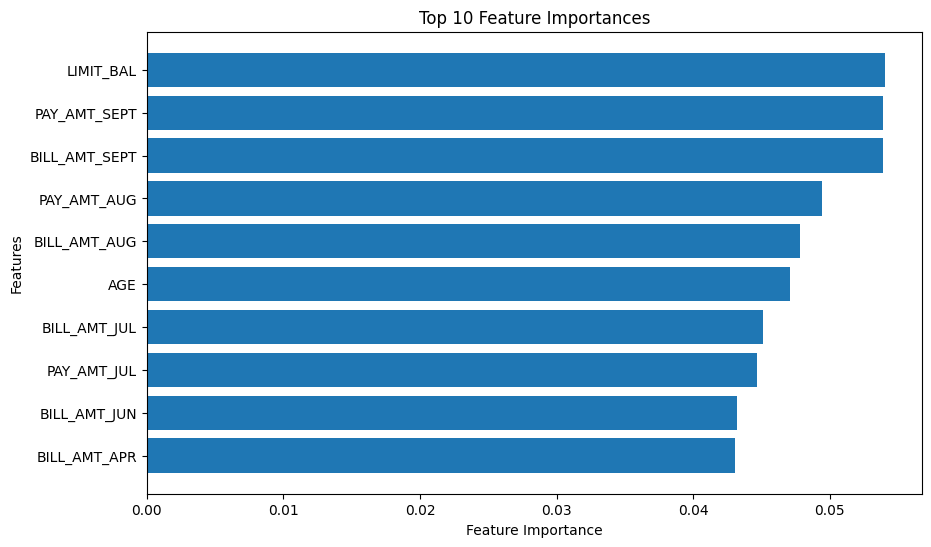

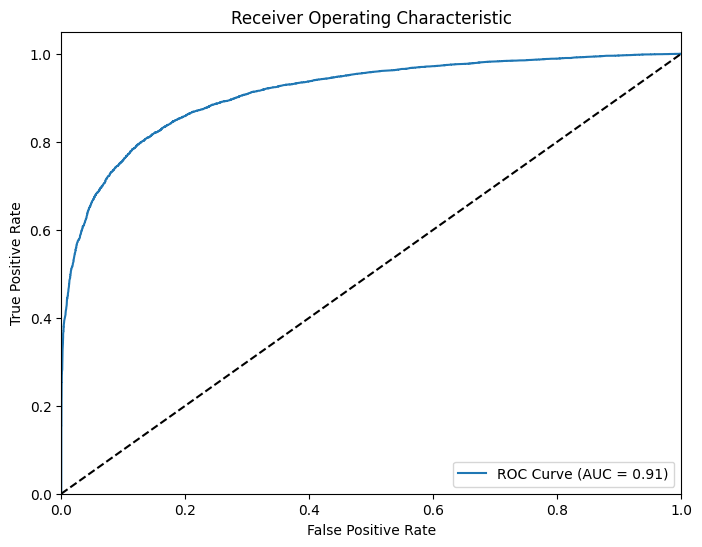

In [136]:
#Run the randomforest
rf = randomForest(X,y)

In [137]:
 # store the metrics of random forest
train_accuracy_rf=rf[0]
test_accuracy_rf = rf[1]
test_precision_score_rf = rf[2]
test_recall_score_rf =rf[3]
test_f1_score_rf = rf[4]
test_roc_score_rf = rf[5]
y_preds_proba_rf = rf[6]
optimal_clf_rf = rf[7]

### ML Model - 3

**Building a XGBoost Model**

In [139]:
#XGBoost Classifier
def xgBoostClassifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #Implement  the model
    xgb_clf = xgb.XGBClassifier()
    xgb_clf.fit(X_train, y_train)

    #Hyperameter tuning
    param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

    #Fit the model
    grid_xgb_clf = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=3)
    grid_xgb_clf.fit(X_train, y_train)

    print("Best score:", grid_xgb_clf.best_score_)
    print("Best parameters:", grid_xgb_clf.best_params_)

    optimal_xgb_clf = grid_xgb_clf.best_estimator_

    # Get the predicted classes
    train_class_preds = optimal_xgb_clf.predict(X_train)
    test_class_preds = optimal_xgb_clf.predict(X_test)

    test_preds = grid_xgb_clf.predict_proba(X_test)[:,1]

    # Get the accuracy scores
    train_accuracy_xgb = accuracy_score(train_class_preds, y_train)
    test_accuracy_xgb = accuracy_score(test_class_preds, y_test)

    print("The accuracy on train data is", train_accuracy_xgb)
    print("The accuracy on test data is", test_accuracy_xgb)

    test_precision_score_xgb = precision_score(test_class_preds, y_test)
    test_recall_score_xgb = recall_score(test_class_preds, y_test)
    test_f1_score_xgb = f1_score(test_class_preds, y_test)
    test_roc_score_xgb = roc_auc_score(test_class_preds, y_test)

    print("The precision on test data is", test_precision_score_xgb)
    print("The recall on test data is", test_recall_score_xgb)
    print("The f1 on test data is", test_f1_score_xgb)
    print("The roc_score on test data is", test_roc_score_xgb)

    #Confusion matrix for train data
    matrix(y_train,train_class_preds,y_test,test_class_preds)

    print('---------------------------------------------------')
    print("\nClassification report:")
    print(classification_report(y_test, test_class_preds))
    print("\n")
    print('---------------------------------------------------')

    # Feature importance
    feature_importance = xgb_clf.feature_importances_
    feature_names = X.columns

    sorted_idx = feature_importance.argsort()
    top_features = feature_names[sorted_idx][-10:]  # Selecting top 10 features

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), feature_importance[sorted_idx][-10:])
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Top 10 Feature Importances")

    plt.show()

    # ROC curve
    y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()
    return (
        train_accuracy_xgb,
        test_accuracy_xgb,
        test_precision_score_xgb,
        test_recall_score_xgb,
        test_f1_score_xgb,
        test_roc_score_xgb,
        test_preds,
        optimal_xgb_clf
    )

Best score: 0.8013862149186998
Best parameters: {'learning_rate': 0.1, 'max_depth': 7}
The accuracy on train data is 0.8372249017791549
The accuracy on test data is 0.8035795344011413
The precision on test data is 0.749126213592233
The recall on test data is 0.8413783076475719
The f1 on test data is 0.7925768677668972
The roc_score on test data is 0.8072629569374463


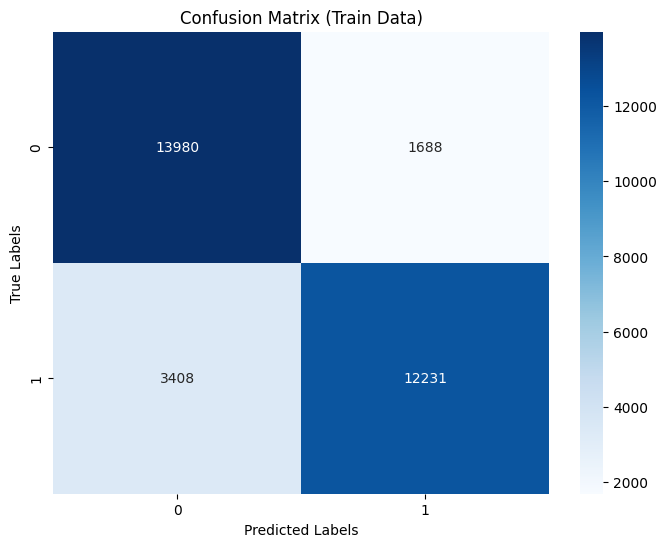

---------------------------------------------------

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      7696
           1       0.84      0.75      0.79      7725

    accuracy                           0.80     15421
   macro avg       0.81      0.80      0.80     15421
weighted avg       0.81      0.80      0.80     15421



---------------------------------------------------


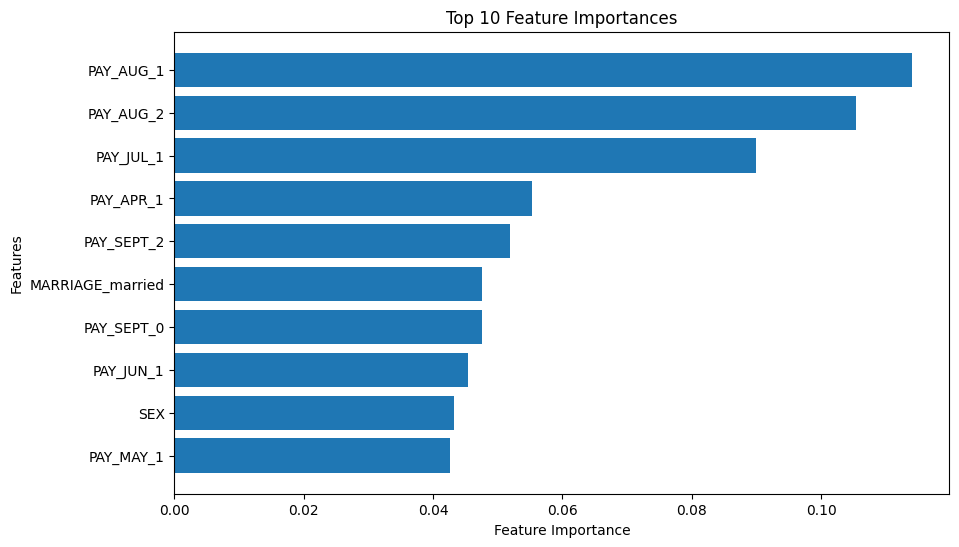

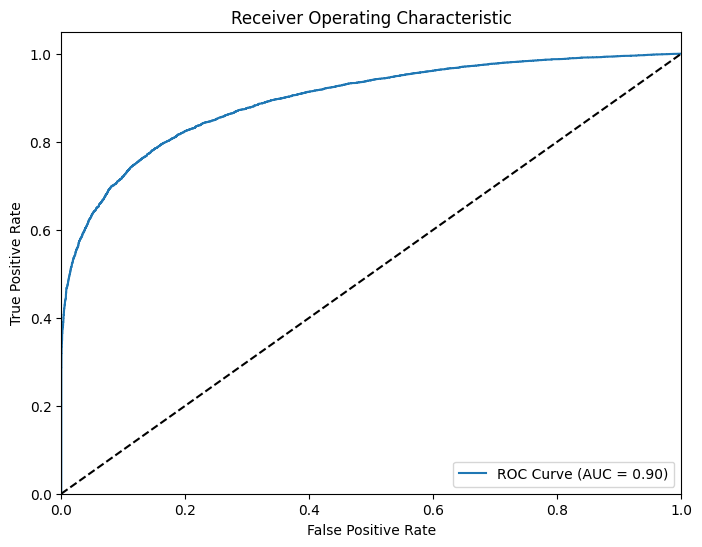

In [140]:
#Run the xgboost
xgb = xgBoostClassifier(X,y)

In [141]:
 # store the metrics of xgboost
train_accuracy_xgb=xgb[0]
test_accuracy_xgb = xgb[1]
test_precision_score_xgb = xgb[2]
test_recall_score_xgb =xgb[3]
test_f1_score_xgb = xgb[4]
test_roc_score_xgb = xgb[5]
y_preds_proba_xgb = xgb[6]
optimal_clf_xgb = xgb[7]

In [142]:
# Create lists of metrics for each classifier
classifiers = ['Logistic Regression', 'Random Forest CLF', 'XGBoost CLF']
train_accuracy = [train_accuracy_lr,train_accuracy_rf, train_accuracy_xgb]
test_accuracy = [test_accuracy_lr, test_accuracy_rf, test_accuracy_xgb]
precision_scores = [test_precision_score_lr,test_precision_score_rf, test_precision_score_xgb]
recall_scores = [test_recall_score_lr,test_recall_score_rf, test_recall_score_xgb]
f1_scores = [test_f1_score_lr,test_f1_score_rf, test_f1_score_xgb]

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Classifier': classifiers,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
    'F1 Score': f1_scores
})
metrics_df.sort_values(by=['Train Accuracy'], ascending=False, inplace=True)
#Print the DataFrame
print(metrics_df)

            Classifier  Train Accuracy  Test Accuracy  Precision Score  \
1    Random Forest CLF        0.998786       0.834576         0.802724   
2          XGBoost CLF        0.837225       0.803580         0.749126   
0  Logistic Regression        0.752420       0.750665         0.686381   

   Recall Score  F1 Score  
1      0.857321  0.829125  
2      0.841378  0.792577  
0      0.787617  0.733523  


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall score is good

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost Classifier is best it gives good results for train and test data

# **Conclusion**

More credit card defualt for limit balance about 10000. It might mean that credit card might be too easy to be issued for people who have low credit scores.

The variance of the default rate for limit balance over 500,000 NTD is higher than other range of limit balance.

It is lower default rate for cardholders have higher education level. Moreover, the default rate for clients whose age over 60 was higher than mid age and young people. The best fit algorithm for predicting limit balance is bagging approach.